# Segmenting and Clustering Neighborhoods in Toronto
## Part 1
To scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe. 
Beautiful Soup is a Python package for parsing HTML and XML documents. 

In [ ]:
!pip install beautifulsoup4

Import requests and BeautifulSoup library.

In [2]:
from bs4 import BeautifulSoup as bs
import requests

Assign the link of the Wikipedia page through which we are going to scrape the data and assign it to a variable named url. requests.get(url).text will ping a website and return you HTML of the website.

In [3]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

Read the source code for the web page and creat a BeautifulSoup (soup) object. Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.

In [ ]:
soup = bs(url,'lxml')
#print(soup.prettify())

Inspect the HTML script all the table contents which we intend to extract is under class Wikitable Sortable, so we need find the class in the HTML script.

In [ ]:
my_table = soup.find('table',{'class':'wikitable sortable'})
my_table

In [ ]:
entries = my_table.find_all('td')
entries

From the entries, we can see the Postcode is the 1st, 4th, 7th, etc. The 2nd, 5th, 8th are for the second column (Borough). The 3rd, 6th, 9th, etc. are for the third column (Neighbourhood). So we need split and extract them.

In [7]:
Postcode = []
Borough = []
Neighbourhood = []

rows = len(entries)//3 #total number of rows in the table

In [8]:
for i in range(rows):
    if entries[i*3+1].text != 'Not assigned': #Ignore cells with a borough that is Not assigned.
        Postcode.append(entries[i*3].text)
        Borough.append(entries[i*3+1].text)
        #If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. 
        if entries[i*3+2].text != 'Not assigned\n': 
            Neighbourhood.append(entries[i*3+2].text.replace('\n', '')) #remove '\n'
        else: 
            Neighbourhood.append(entries[i*3+1].text)

In [10]:
import pandas as pd

In [121]:
df = pd.DataFrame({'PostalCode': Postcode, 'Borough': Borough, 'Neighborhood': Neighbourhood})
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


Now we got every effective row in the original table. Let's combine rows with the same postal code into one row, with the neighborhoods separated with a comma.

In [122]:
#define a custom aggregation function that joins unique strings by a comma
f = lambda a: ",".join(a.unique()) 
df_c = df.groupby(df['PostalCode']).agg({'Borough':f, 'Neighborhood':f}).reset_index()
df_c.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [123]:
print('The number of rows of postal codes:', df_c.shape[0])

The number of rows of postal codes: 103


## Part 2

Get the latitude and the longitude coordinates of each neighborhood, using a given csv file that has the geographical coordinates of each postal code. The csv file is at http://cocl.us/Geospatial_data

In [14]:
file = 'http://cocl.us/Geospatial_data/Geospatial_Coordinates.csv'
df_geo = pd.read_csv(file) 

In [124]:
df_geo.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:
df_geo.columns = ['PostalCode', 'Latitude', 'Longitude'] #unify the column name for postal code for merging

Merge two dataframes according to postal code.

In [17]:
df_m = pd.merge(df_c, df_geo, on="PostalCode")
df_m

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


## Part 3
Explore and cluster the neighborhoods in Toronto. 

In [96]:
import numpy as np 

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
#!pip install folium
import folium # map rendering library

Find the boroughs that contain the word 'Toronto'. We will each area with a unique postal code and a geography address as a neighborhood, thought some postal codes have multiple small neighborhoods. 

In [125]:
df_Toronto = df_m[df_m['Borough'].str.contains("Toronto")]
df_Toronto.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [22]:
df_Toronto.shape

(38, 5)

Here we got 38 postal codes in Toronto as our neighborhoods in future anaysis.
Then create a map of Toronto with neighborhoods superimposed on top of it.

In [24]:
# create map of Toronto using latitude and longitude values Googled
latitude = 43.651070
longitude = -79.347015
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

In [25]:
# add markers to map
for lat, lng, borough, neighborhood in zip(df_Toronto['Latitude'], df_Toronto['Longitude'], df_Toronto['Borough'], df_Toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them. 

Define Foursquare Credentials and Version

In [29]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Borrow the defined function from the lab to get nearby venues of neighborhoods

In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [37]:
toronto_venues = getNearbyVenues(names=df_Toronto['Neighborhood'],
                                latitudes=df_Toronto['Latitude'],
                                longitudes=df_Toronto['Longitude'])
toronto_venues.shape

(1700, 7)

In [38]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


Find out how many unique categories can be curated from all the returned venues

In [45]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 239 uniques categories.


#### Analyze Each Neighborhood

In [62]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
i = list(toronto_onehot.columns).index('Neighborhood')
fixed_columns = ['Neighborhood'] + list(toronto_onehot.columns)[:i] + list(toronto_onehot.columns)[i+1:]
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
toronto_onehot.shape

(1700, 239)

In [126]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide,King,Richmond",0.0,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.04,...,0.0,0.0,0.010000,0.0,0.0,0.0,0.01,0.0,0.0,0.000000
1,Berczy Park,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.00,...,0.0,0.0,0.018182,0.0,0.0,0.0,0.00,0.0,0.0,0.000000
2,"Brockton,Exhibition Place,Parkdale Village",0.0,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.045455
3,Business Reply Mail Processing Centre 969 Eastern,0.0,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.052632
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",0.0,0.0,0.0625,0.0625,0.0625,0.125,0.125,0.125,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000


In [65]:
toronto_grouped.shape

(38, 239)

Define a function to sort the venues in descending order.

In [68]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood.

In [69]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Coffee Shop,Café,Thai Restaurant,Bar,Steakhouse,American Restaurant,Gym,Cosmetics Shop,Restaurant,Hotel
1,Berczy Park,Coffee Shop,Cocktail Bar,Café,Beer Bar,Steakhouse,Bakery,Seafood Restaurant,Farmers Market,Cheese Shop,Italian Restaurant
2,"Brockton,Exhibition Place,Parkdale Village",Breakfast Spot,Café,Coffee Shop,Yoga Studio,Intersection,Burrito Place,Performing Arts Venue,Stadium,Caribbean Restaurant,Restaurant
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Pizza Place,Brewery,Skate Park,Burrito Place,Butcher,Restaurant,Recording Studio,Comic Shop,Spa
4,"CN Tower,Bathurst Quay,Island airport,Harbourf...",Airport Lounge,Airport Service,Airport Terminal,Boutique,Harbor / Marina,Sculpture Garden,Boat or Ferry,Bar,Plane,Coffee Shop


#### Clustering Neighborhoods
Run k-means to cluster the neighborhood. First we want to find a good k value.

In [92]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

In [93]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

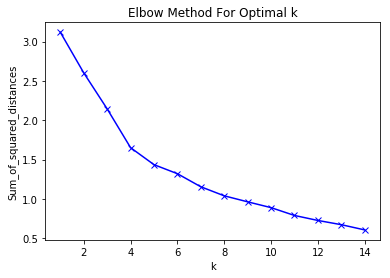

In [97]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

It seems k = 5 or 6 is the "elbow" for this plot.

In [98]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       3, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [99]:
# add clustering labels
neighborhoods_venues_sorted['Cluster Labels'] = kmeans.labels_

toronto_merged = df_Toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Trail,Pub,Other Great Outdoors,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Brewery,Bakery,Fruit & Vegetable Store,Juice Bar,Spa
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,0,Park,Italian Restaurant,Pet Store,Pizza Place,Gym,Pub,Movie Theater,Sandwich Place,Burrito Place,Burger Joint
43,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Gastropub,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Gym / Fitness Center,Brewery,Seafood Restaurant
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Park,Swim School,Bus Line,Yoga Studio,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


#### Visuzlize the clusters

In [100]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters
It seems we have a cluster mainly dominatated by food & drink service (>=5 among the top 10), then the other clusters have (<5 food & drink venues). 

In [101]:
#Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,East Toronto,0,Health Food Store,Trail,Pub,Other Great Outdoors,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
41,East Toronto,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Brewery,Bakery,Fruit & Vegetable Store,Juice Bar,Spa
42,East Toronto,0,Park,Italian Restaurant,Pet Store,Pizza Place,Gym,Pub,Movie Theater,Sandwich Place,Burrito Place,Burger Joint
43,East Toronto,0,Café,Coffee Shop,Gastropub,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Gym / Fitness Center,Brewery,Seafood Restaurant
45,Central Toronto,0,Park,Breakfast Spot,Gym,Grocery Store,Hotel,Sandwich Place,Food & Drink Shop,Clothing Store,Eastern European Restaurant,Doner Restaurant
46,Central Toronto,0,Coffee Shop,Yoga Studio,Bagel Shop,Park,Clothing Store,Chinese Restaurant,Rental Car Location,Dessert Shop,Diner,Salon / Barbershop
47,Central Toronto,0,Pizza Place,Sandwich Place,Dessert Shop,Italian Restaurant,Coffee Shop,Thai Restaurant,Sushi Restaurant,Café,Restaurant,Deli / Bodega
49,Central Toronto,0,Coffee Shop,Pub,Fried Chicken Joint,Bagel Shop,Pizza Place,Vietnamese Restaurant,Liquor Store,Sushi Restaurant,Light Rail Station,Supermarket
51,Downtown Toronto,0,Coffee Shop,Restaurant,Café,Park,Italian Restaurant,Pizza Place,Pub,Bakery,Farmers Market,Breakfast Spot
52,Downtown Toronto,0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Gym,Gastropub,Fast Food Restaurant,Mediterranean Restaurant,Men's Store


In [102]:
#Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Central Toronto,1,Tennis Court,Playground,Concert Hall,Dog Run,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


In [103]:
#Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Central Toronto,2,Ice Cream Shop,Garden,Yoga Studio,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [104]:
#Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Central Toronto,3,Park,Swim School,Bus Line,Yoga Studio,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


In [105]:
#Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Downtown Toronto,4,Park,Playground,Trail,Building,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
64,Central Toronto,4,Trail,Jewelry Store,Park,Sushi Restaurant,Yoga Studio,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant


####  Let's try k = 6.

In [112]:
# set number of clusters
kclusters2 = 6

# run k-means clustering
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans2.labels_ 

array([4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 4, 1, 1, 1, 4, 1, 4, 2, 4, 4, 1, 4,
       5, 4, 0, 1, 1, 2, 3, 1, 4, 4, 4, 4, 1, 1, 1, 4], dtype=int32)

In [113]:
# add clustering labels
neighborhoods_venues_sorted['Cluster Labels'] = kmeans2.labels_

toronto_merged = df_Toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Health Food Store,Trail,Pub,Other Great Outdoors,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
41,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,4,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Brewery,Bakery,Fruit & Vegetable Store,Juice Bar,Spa
42,M4L,East Toronto,"The Beaches West,India Bazaar",43.668999,-79.315572,1,Park,Italian Restaurant,Pet Store,Pizza Place,Gym,Pub,Movie Theater,Sandwich Place,Burrito Place,Burger Joint
43,M4M,East Toronto,Studio District,43.659526,-79.340923,4,Café,Coffee Shop,Gastropub,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Gym / Fitness Center,Brewery,Seafood Restaurant
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,5,Park,Swim School,Bus Line,Yoga Studio,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


In [114]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [115]:
#Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Central Toronto,0,Tennis Court,Playground,Concert Hall,Dog Run,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


In [116]:
#Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,East Toronto,1,Health Food Store,Trail,Pub,Other Great Outdoors,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
42,East Toronto,1,Park,Italian Restaurant,Pet Store,Pizza Place,Gym,Pub,Movie Theater,Sandwich Place,Burrito Place,Burger Joint
45,Central Toronto,1,Park,Breakfast Spot,Gym,Grocery Store,Hotel,Sandwich Place,Food & Drink Shop,Clothing Store,Eastern European Restaurant,Doner Restaurant
46,Central Toronto,1,Coffee Shop,Yoga Studio,Bagel Shop,Park,Clothing Store,Chinese Restaurant,Rental Car Location,Dessert Shop,Diner,Salon / Barbershop
47,Central Toronto,1,Pizza Place,Sandwich Place,Dessert Shop,Italian Restaurant,Coffee Shop,Thai Restaurant,Sushi Restaurant,Café,Restaurant,Deli / Bodega
49,Central Toronto,1,Coffee Shop,Pub,Fried Chicken Joint,Bagel Shop,Pizza Place,Vietnamese Restaurant,Liquor Store,Sushi Restaurant,Light Rail Station,Supermarket
51,Downtown Toronto,1,Coffee Shop,Restaurant,Café,Park,Italian Restaurant,Pizza Place,Pub,Bakery,Farmers Market,Breakfast Spot
53,Downtown Toronto,1,Coffee Shop,Park,Bakery,Pub,Theater,Breakfast Spot,Café,Restaurant,Mexican Restaurant,Brewery
65,Central Toronto,1,Coffee Shop,Sandwich Place,Café,Pizza Place,History Museum,Indian Restaurant,Pharmacy,Cosmetics Shop,Pub,Burger Joint
75,Downtown Toronto,1,Grocery Store,Café,Park,Nightclub,Convenience Store,Baby Store,Diner,Coffee Shop,Italian Restaurant,Restaurant


In [117]:
#Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Downtown Toronto,2,Park,Playground,Trail,Building,Discount Store,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant
64,Central Toronto,2,Trail,Jewelry Store,Park,Sushi Restaurant,Yoga Studio,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant


In [118]:
#Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,Central Toronto,3,Ice Cream Shop,Garden,Yoga Studio,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [119]:
#Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,East Toronto,4,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Brewery,Bakery,Fruit & Vegetable Store,Juice Bar,Spa
43,East Toronto,4,Café,Coffee Shop,Gastropub,Italian Restaurant,Bakery,American Restaurant,Yoga Studio,Gym / Fitness Center,Brewery,Seafood Restaurant
52,Downtown Toronto,4,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Gay Bar,Gym,Gastropub,Fast Food Restaurant,Mediterranean Restaurant,Men's Store
54,Downtown Toronto,4,Coffee Shop,Clothing Store,Cosmetics Shop,Fast Food Restaurant,Café,Middle Eastern Restaurant,Theater,Italian Restaurant,Restaurant,Ramen Restaurant
55,Downtown Toronto,4,Café,Coffee Shop,Restaurant,Hotel,Gastropub,Bakery,Breakfast Spot,Cosmetics Shop,Italian Restaurant,Pizza Place
56,Downtown Toronto,4,Coffee Shop,Cocktail Bar,Café,Beer Bar,Steakhouse,Bakery,Seafood Restaurant,Farmers Market,Cheese Shop,Italian Restaurant
57,Downtown Toronto,4,Coffee Shop,Café,Italian Restaurant,Burger Joint,Middle Eastern Restaurant,Sandwich Place,Ice Cream Shop,Bakery,Bubble Tea Shop,Japanese Restaurant
58,Downtown Toronto,4,Coffee Shop,Café,Thai Restaurant,Bar,Steakhouse,American Restaurant,Gym,Cosmetics Shop,Restaurant,Hotel
59,Downtown Toronto,4,Coffee Shop,Hotel,Aquarium,Café,Italian Restaurant,Fried Chicken Joint,Pizza Place,Bakery,Brewery,Restaurant
60,Downtown Toronto,4,Coffee Shop,Café,Hotel,Restaurant,Bakery,Bar,Gastropub,Italian Restaurant,American Restaurant,Deli / Bodega


In [120]:
#Cluster 6
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Central Toronto,5,Park,Swim School,Bus Line,Yoga Studio,Dog Run,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


The clustering results of k = 6 is quite similar to that of k = 5, except the largestest cluster was split into two smaller clusters, but I didn't see a interpretation for the splitting. I'm more inclined to using k-means with k =5.